<a href="https://colab.research.google.com/github/AlbertPangilinan/SEP740/blob/main/ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fitting image 0...
Image 0 fitted to all models.
Fitting image 1...
Image 1 fitted to all models.
Fitting image 2...
Image 2 fitted to all models.
Fitting image 3...
Image 3 fitted to all models.
Fitting image 4...
Image 4 fitted to all models.
Fitting image 5...
Image 5 fitted to all models.
Fitting image 6...
Image 6 fitted to all models.
Fitting image 7...
Image 7 fitted to all models.
Fitting image 8...
Image 8 fitted to all models.
Predicting labels for image 9...
Labels for image 9 predicted.


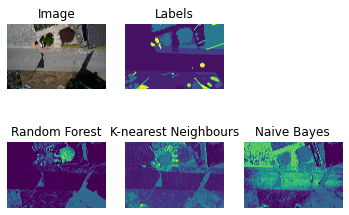

In [ ]:
# SEP 740 Final Project - Aerial Perspective Object Detection

# Authors: 
#   Jukai Hu (400485702)
#   Ray Albert Pangilinan (400065058)
#   Luke Vanden Broek (400486889)

# ML Algorithms (Random Forest, K-nearest Neighbours, Naive Bayes)

# Imports

import os.path
cwd = os.getcwd()
cwd="/content/drive/MyDrive/SEP740/Project/dataset"


import matplotlib. pyplot as plt
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Reading raw image and class label files from disk

images_dir = cwd + "/dataset/semantic_drone_dataset/original_images/"
labels_dir = cwd + "/dataset/semantic_drone_dataset/label_images_semantic/"

images_paths = os.listdir(images_dir)
images_paths.sort()
image_0_filename = images_paths[0]

labels_paths = os.listdir(labels_dir)
labels_paths.sort()
label_0_filename = labels_paths[0]

images_paths = list(map(lambda img : images_dir + img, images_paths))
labels_paths = list(map(lambda img : labels_dir + img, labels_paths))

images_paths.sort()
labels_paths.sort()

images = list(map(lambda img : np.array(Image.open(img)), images_paths[:10]))
labels = list(map(lambda img : np.array(Image.open(img)), labels_paths[:10]))

# Defining ML algorithms

rf = RandomForestClassifier(max_depth=2)
knn = KNeighborsClassifier(n_neighbors = 3)
nb = GaussianNB()

# Fitting each image to each model

for i in range(len(images) - 1):
  print("Fitting image " + str(i) + "...")
  image = images[i]
  label = labels[i]

  image_reshape = image.reshape(-1, image.shape[-1])
  label_flatten = label.flatten()

  rf.fit(image_reshape, label_flatten)
  knn.fit(image_reshape, label_flatten)
  nb.fit(image_reshape, label_flatten)

  print("Image " + str(i) + " fitted to all models.")

# Predict labels for one image using trained models

print("Predicting labels for image " + str(len(images) - 1) + "...")

image_predict = images[-1]
label_predict = labels[-1]

image_predict_reshape = image_predict.reshape(-1, image_predict.shape[-1])
label_predict_flatten = label_predict.flatten()

label_predict_rf = rf.predict(image_predict_reshape)
label_predict_knn = knn.predict(image_predict_reshape)
label_predict_nb = nb.predict(image_predict_reshape)

label_predict_rf_reshape = np.reshape(label_predict_rf, (4000, -1))
label_predict_knn_reshape = np.reshape(label_predict_knn, (4000, -1))
label_predict_nb_reshape = np.reshape(label_predict_nb, (4000, -1))

print("Labels for image " + str(len(images) - 1) + " predicted.")

# Plotting prediction results

fig, ax = plt.subplots(2, 3)

ax[0, 0].imshow(image_predict)
ax[0, 0].set_title("Image")
ax[0, 0].axis("off")

ax[0, 1].imshow(label_predict)
ax[0, 1].set_title("Labels")
ax[0, 1].axis("off")

ax[0, 2].axis("off")

ax[1, 0].imshow(label_predict_rf_reshape)
ax[1, 0].set_title("Random Forest")
ax[1, 0].axis("off")

ax[1, 1].imshow(label_predict_knn_reshape)
ax[1, 1].set_title("K-nearest Neighbours")
ax[1, 1].axis("off")

ax[1, 2].imshow(label_predict_nb_reshape)
ax[1, 2].set_title("Naive Bayes")
ax[1, 2].axis("off")

plt.show()